In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import time, sys, os
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/hour.csv'))
dataset.head()
dataset.info()
dataset.shape
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [17]:
dataset_dup = dataset.copy()
dataset_dup.info()
dataset_dup.head()
dataset_dup.shape
dataset_dup.describe()
print("Percentage of Null Values of dataset Features:")
round(100*(dataset_dup.isnull().sum()/len(dataset_dup)), 2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Percentage of Null Values of dataset Features:


instant       0.0
weathersit    0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
workingday    0.0
dteday        0.0
weekday       0.0
holiday       0.0
hr            0.0
mnth          0.0
yr            0.0
season        0.0
cnt           0.0
dtype: float64

In [18]:
dataset_dup.drop_duplicates(subset = None, inplace = True)
print(dataset_dup.shape)
print(dataset.shape)

(17379, 17)
(17379, 17)


       weathersit  registered  season  hr  yr  casual  windspeed   hum  \
0               1          13       1   0   0       3     0.0000  0.81   
1               1          32       1   1   0       8     0.0000  0.80   
2               1          27       1   2   0       5     0.0000  0.80   
3               1          10       1   3   0       3     0.0000  0.75   
4               1           1       1   4   0       0     0.0000  0.75   
...           ...         ...     ...  ..  ..     ...        ...   ...   
17374           2         108       1  19   1      11     0.1642  0.60   
17375           2          81       1  20   1       8     0.1642  0.60   
17376           1          83       1  21   1       7     0.1642  0.60   
17377           1          48       1  22   1      13     0.1343  0.56   
17378           1          37       1  23   1      12     0.1343  0.65   

        atemp  cnt  workingday  weekday  holiday  
0      0.2879   16           0        6        0  
1      0.

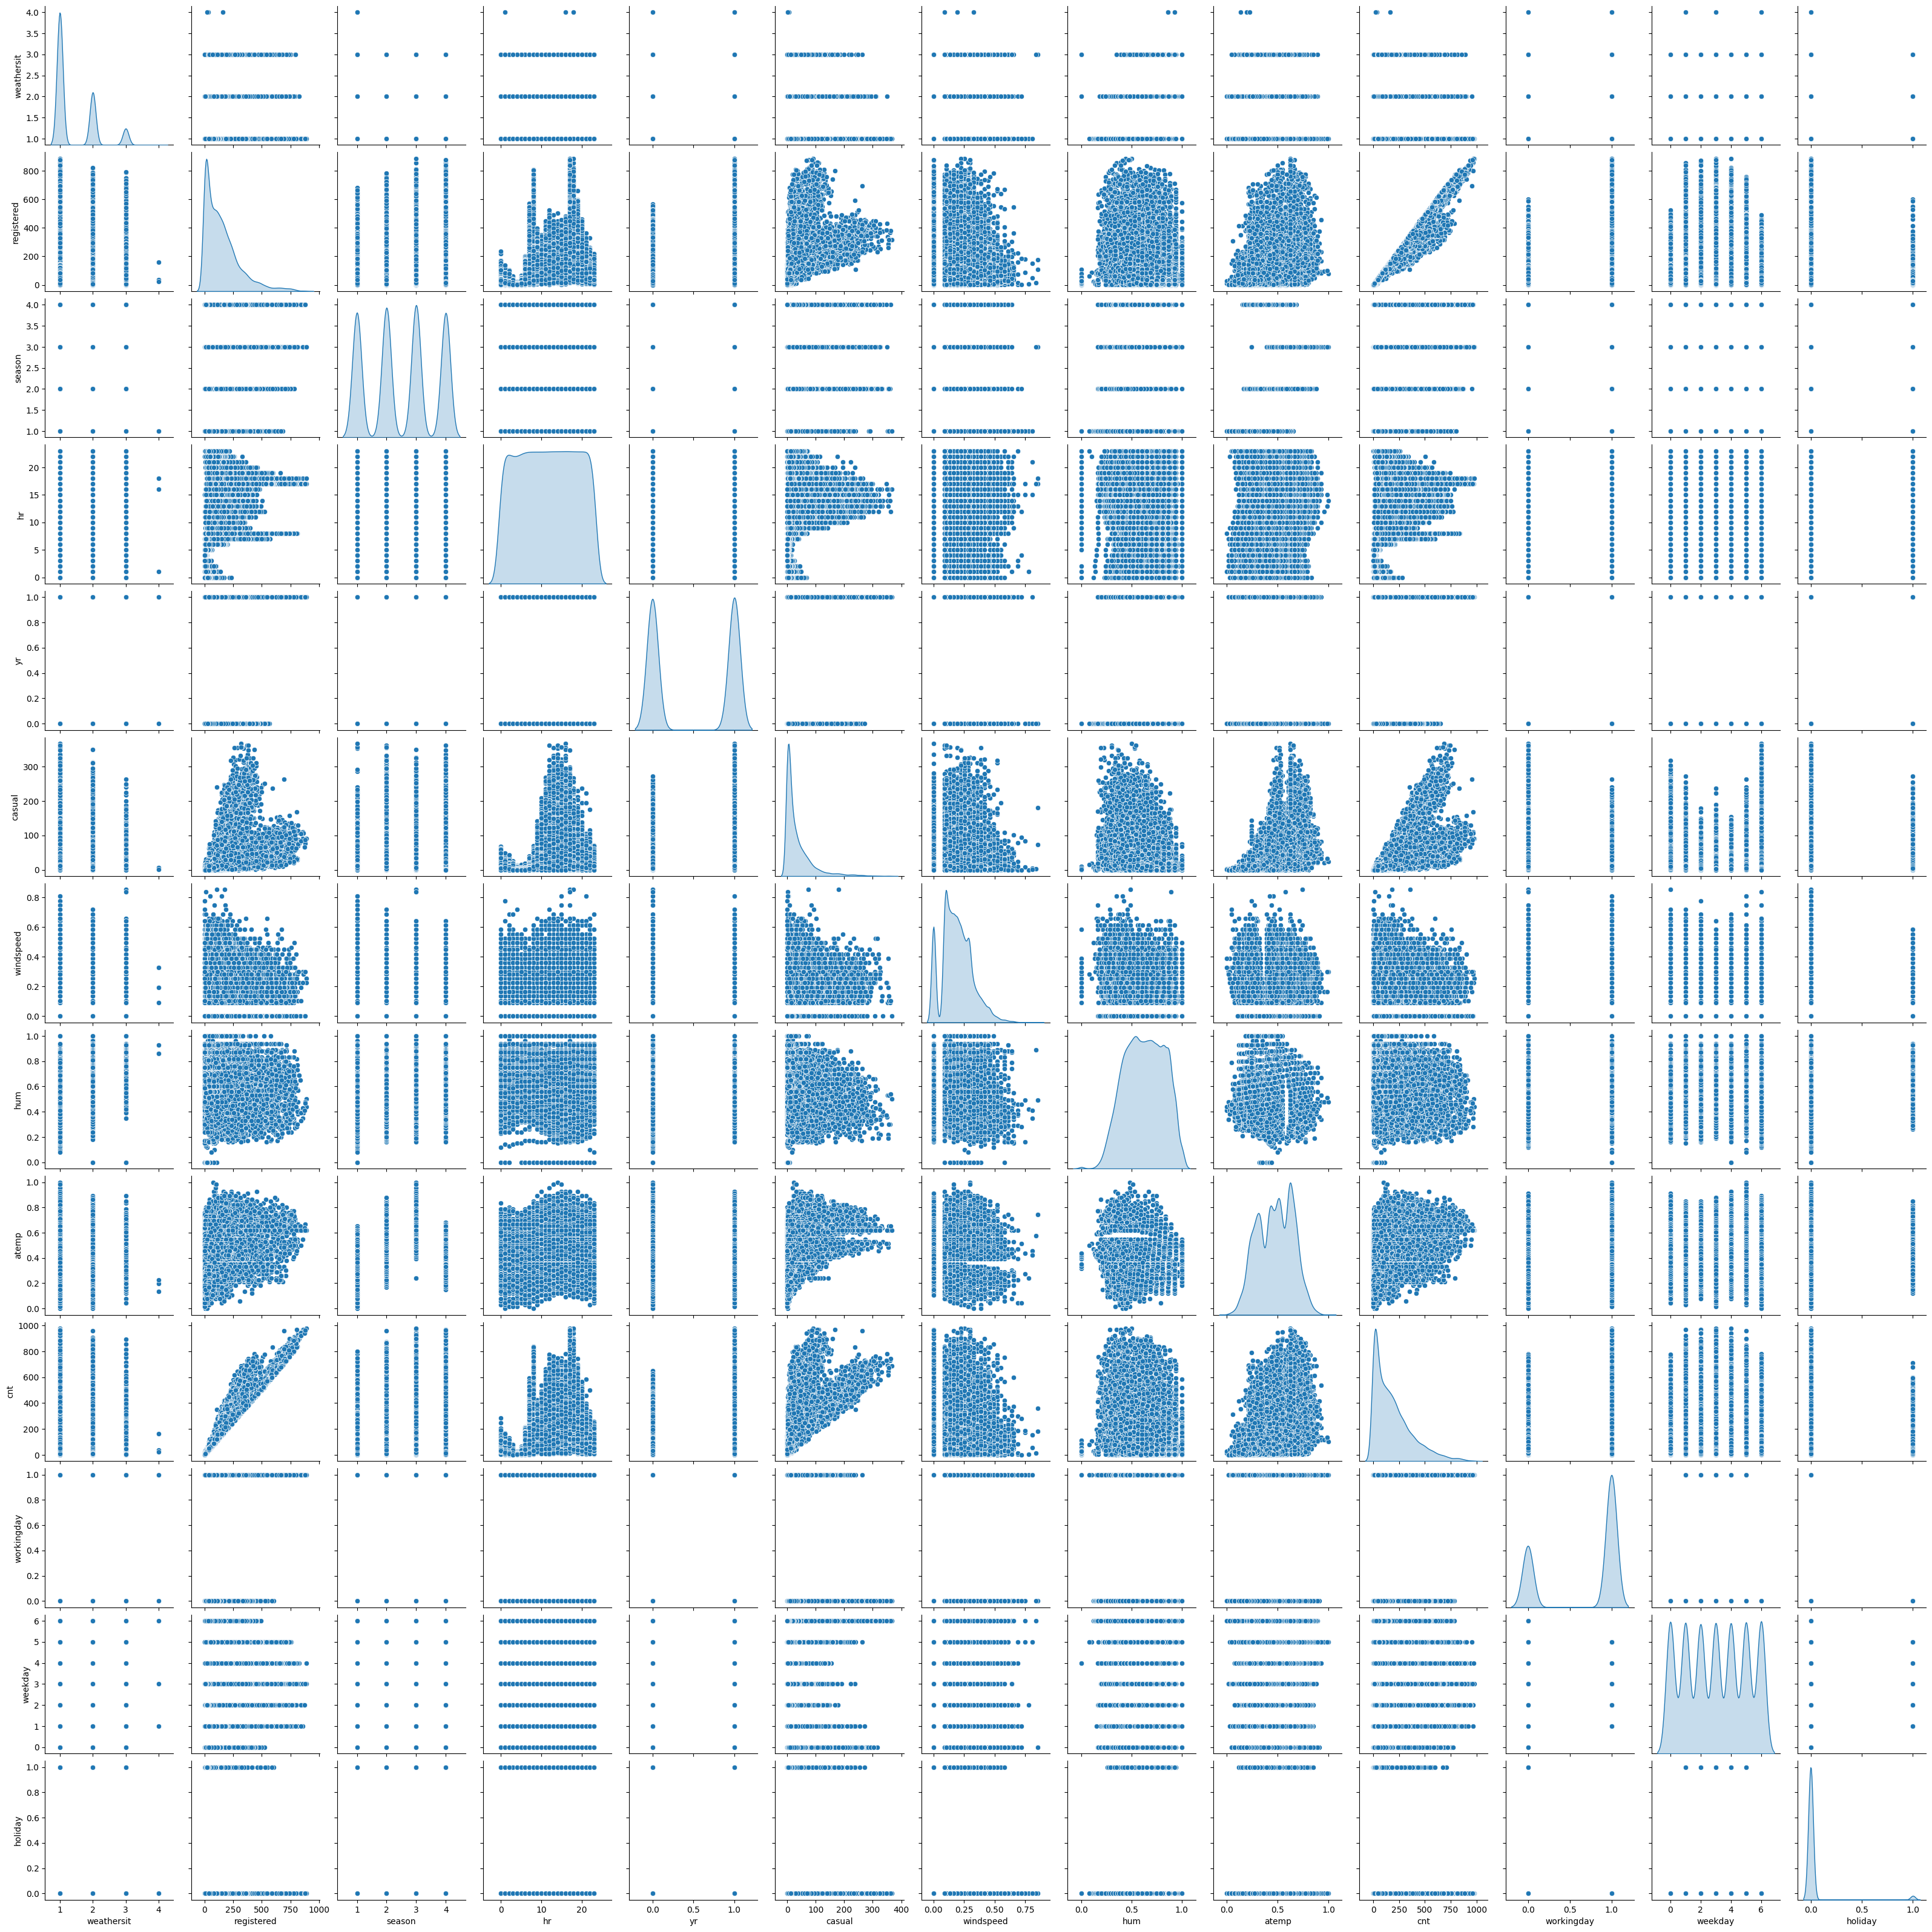

In [45]:
X = dataset[['weathersit', 'registered', 'season', 'hr', 'yr', 'casual', 'windspeed', 'hum', 'atemp', 'cnt', 'workingday', 'weekday', 'holiday']]
y = dataset['temp']

print(X, y)
X.head()
X.describe()
y.head()
y.describe()

sns.pairplot(X, diag_kind='kde')

       weathersit  registered  season  hr  yr  casual  windspeed   hum  \
0               1          13       1   0   0       3     0.0000  0.81   
1               1          32       1   1   0       8     0.0000  0.80   
2               1          27       1   2   0       5     0.0000  0.80   
3               1          10       1   3   0       3     0.0000  0.75   
4               1           1       1   4   0       0     0.0000  0.75   
...           ...         ...     ...  ..  ..     ...        ...   ...   
17374           2         108       1  19   1      11     0.1642  0.60   
17375           2          81       1  20   1       8     0.1642  0.60   
17376           1          83       1  21   1       7     0.1642  0.60   
17377           1          48       1  22   1      13     0.1343  0.56   
17378           1          37       1  23   1      12     0.1343  0.65   

        atemp  cnt  workingday  weekday  holiday  
0      0.2879   16           0        6        0  
1      0.

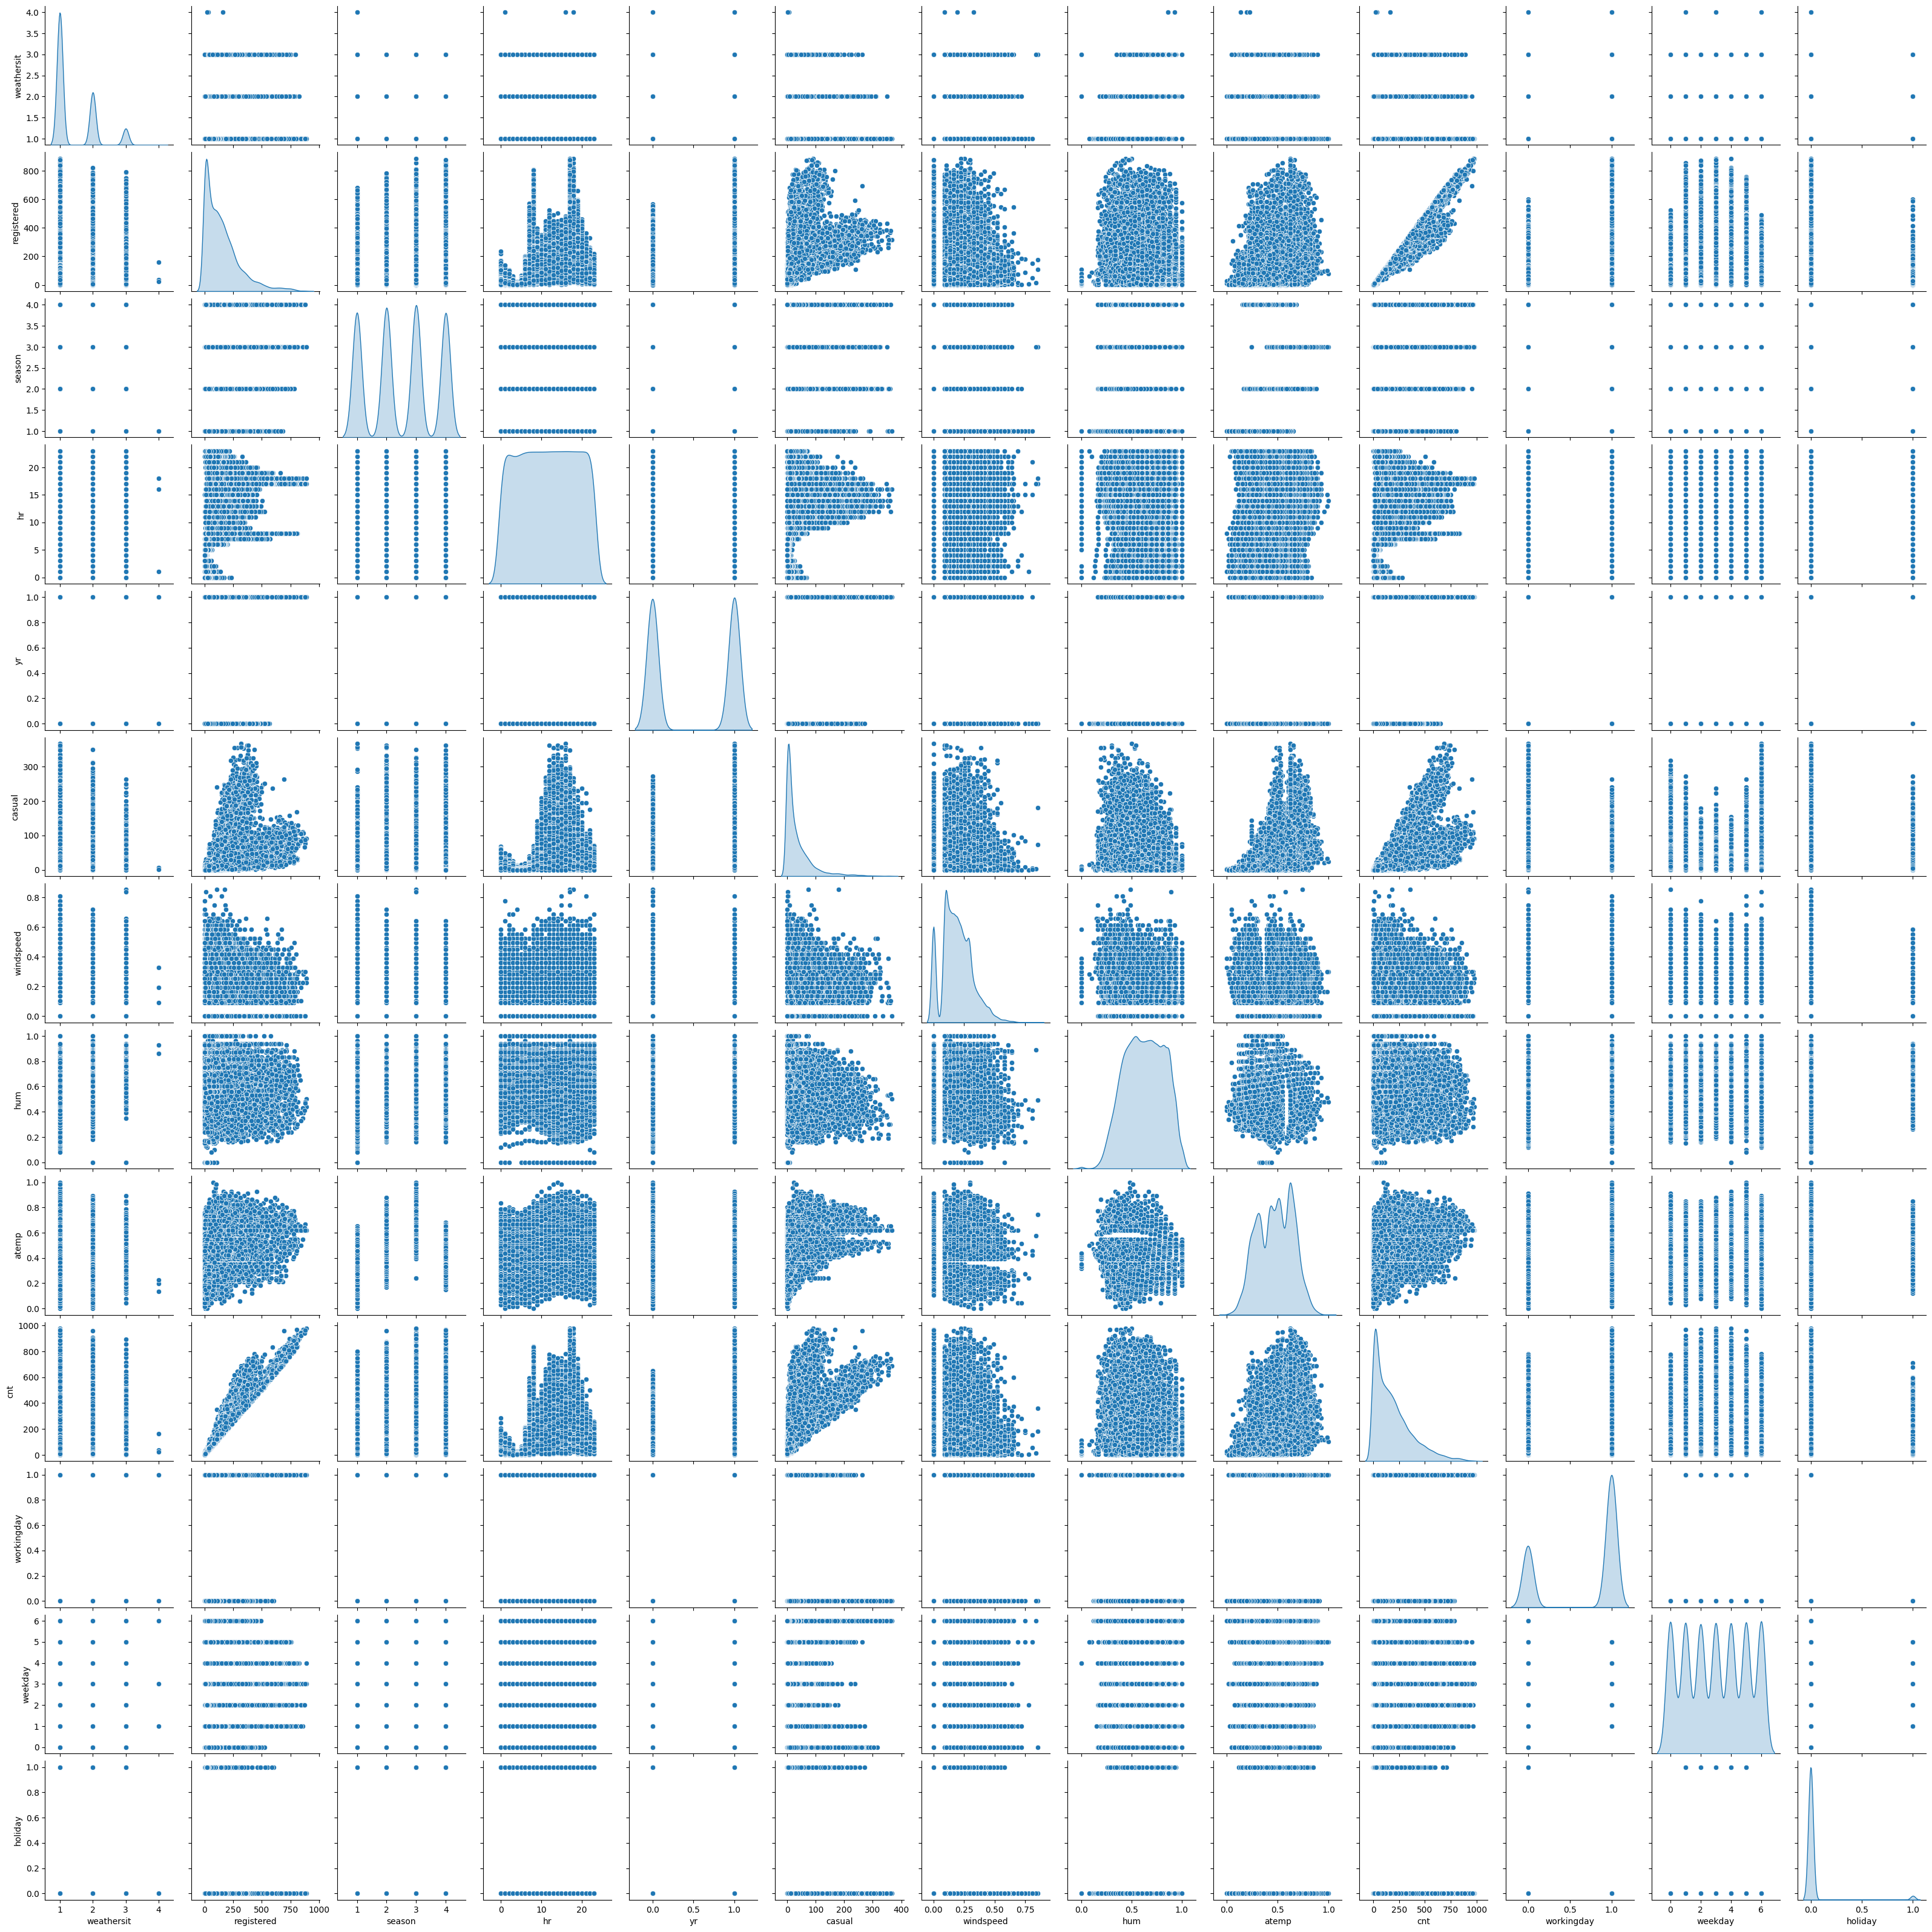

In [46]:
X_dup = dataset_dup[['weathersit', 'registered', 'season', 'hr', 'yr', 'casual', 'windspeed', 'hum', 'atemp', 'cnt', 'workingday', 'weekday', 'holiday']]
y_dup = dataset_dup['temp']

print(X_dup, y_dup)
X_dup.head()
X_dup.describe()
y_dup.head()
y_dup.describe()

sns.pairplot(X_dup, diag_kind='kde')

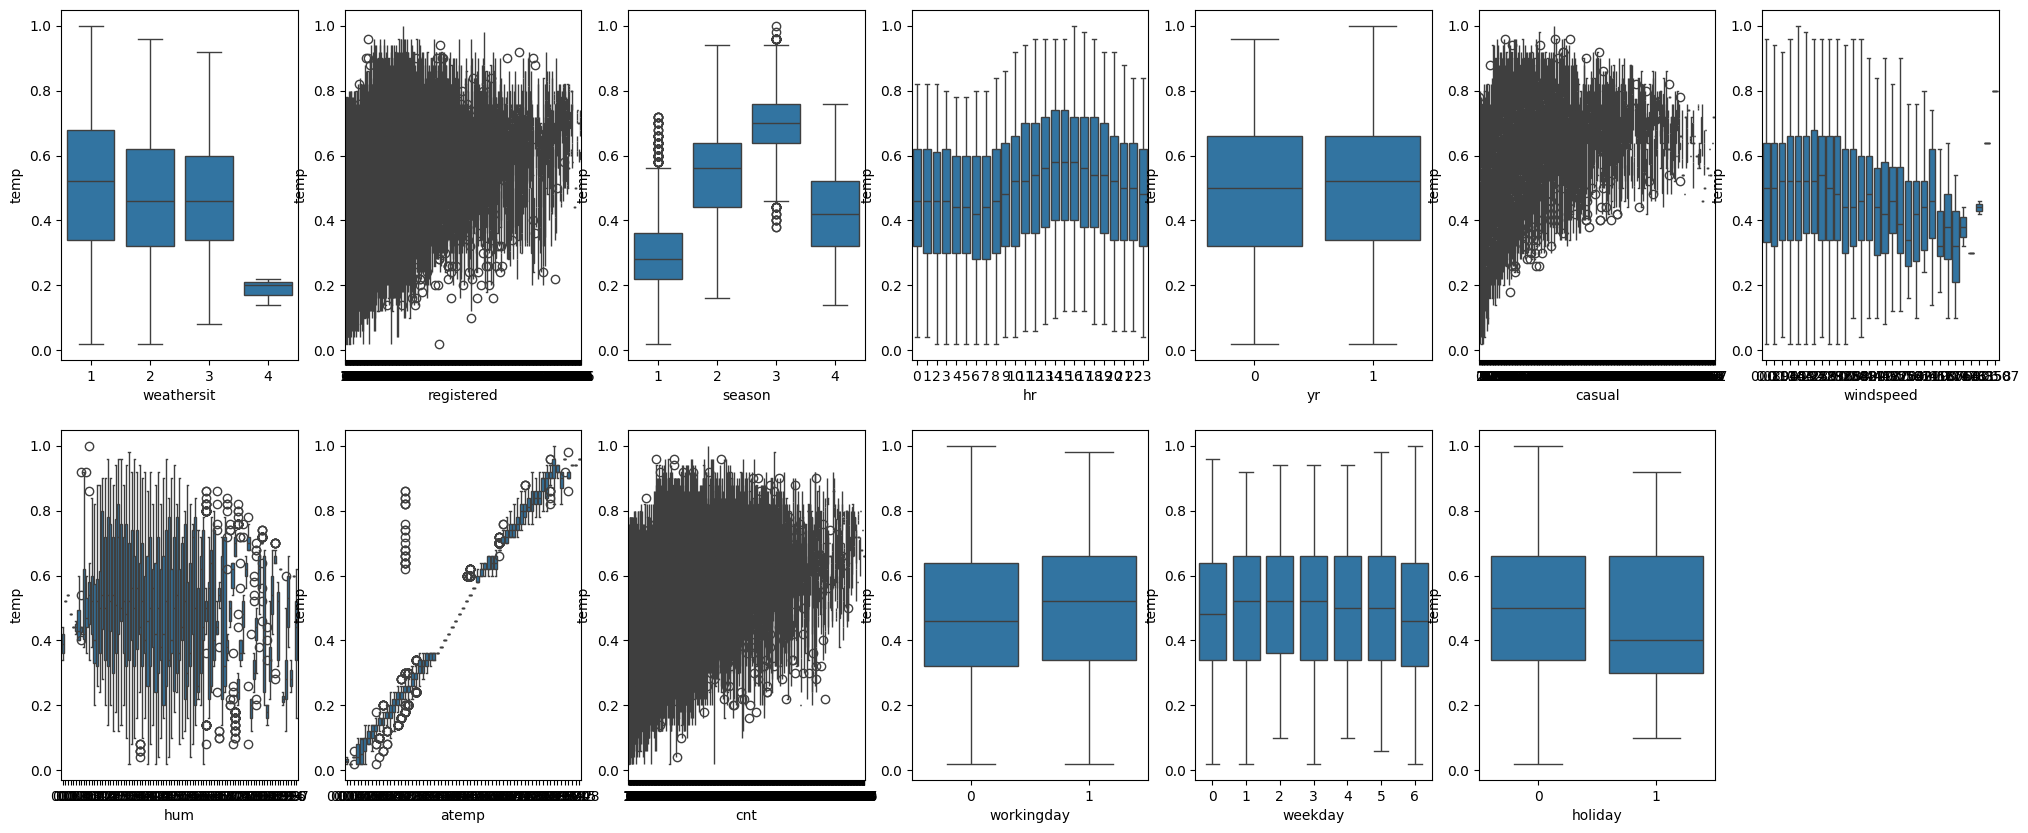

In [47]:
plt.figure(figsize=(25, 10))
plt.subplot(2,7,1)
sns.boxplot(x = 'weathersit', y = 'temp', data = dataset_dup)
plt.subplot(2,7,2)
sns.boxplot(x = 'registered', y = 'temp', data = dataset_dup)
plt.subplot(2,7,3)
sns.boxplot(x = 'season', y = 'temp', data = dataset_dup)
plt.subplot(2,7,4)
sns.boxplot(x = 'hr', y = 'temp', data = dataset_dup)
plt.subplot(2,7,5)
sns.boxplot(x = 'yr', y = 'temp', data = dataset_dup)
plt.subplot(2,7,6)
sns.boxplot(x = 'casual', y = 'temp', data = dataset_dup)
plt.subplot(2,7,7)
sns.boxplot(x = 'windspeed', y = 'temp', data = dataset_dup)
plt.subplot(2,7,8)
sns.boxplot(x = 'hum', y = 'temp', data = dataset_dup)
plt.subplot(2,7,9)
sns.boxplot(x = 'atemp', y = 'temp', data = dataset_dup)
plt.subplot(2,7,10)
sns.boxplot(x = 'cnt', y = 'temp', data = dataset_dup)
plt.subplot(2,7,11)
sns.boxplot(x = 'workingday', y = 'temp', data = dataset_dup)
plt.subplot(2,7,12)
sns.boxplot(x = 'weekday', y = 'temp', data = dataset_dup)
plt.subplot(2,7,13)
sns.boxplot(x = 'holiday', y = 'temp', data = dataset_dup)
plt.show()

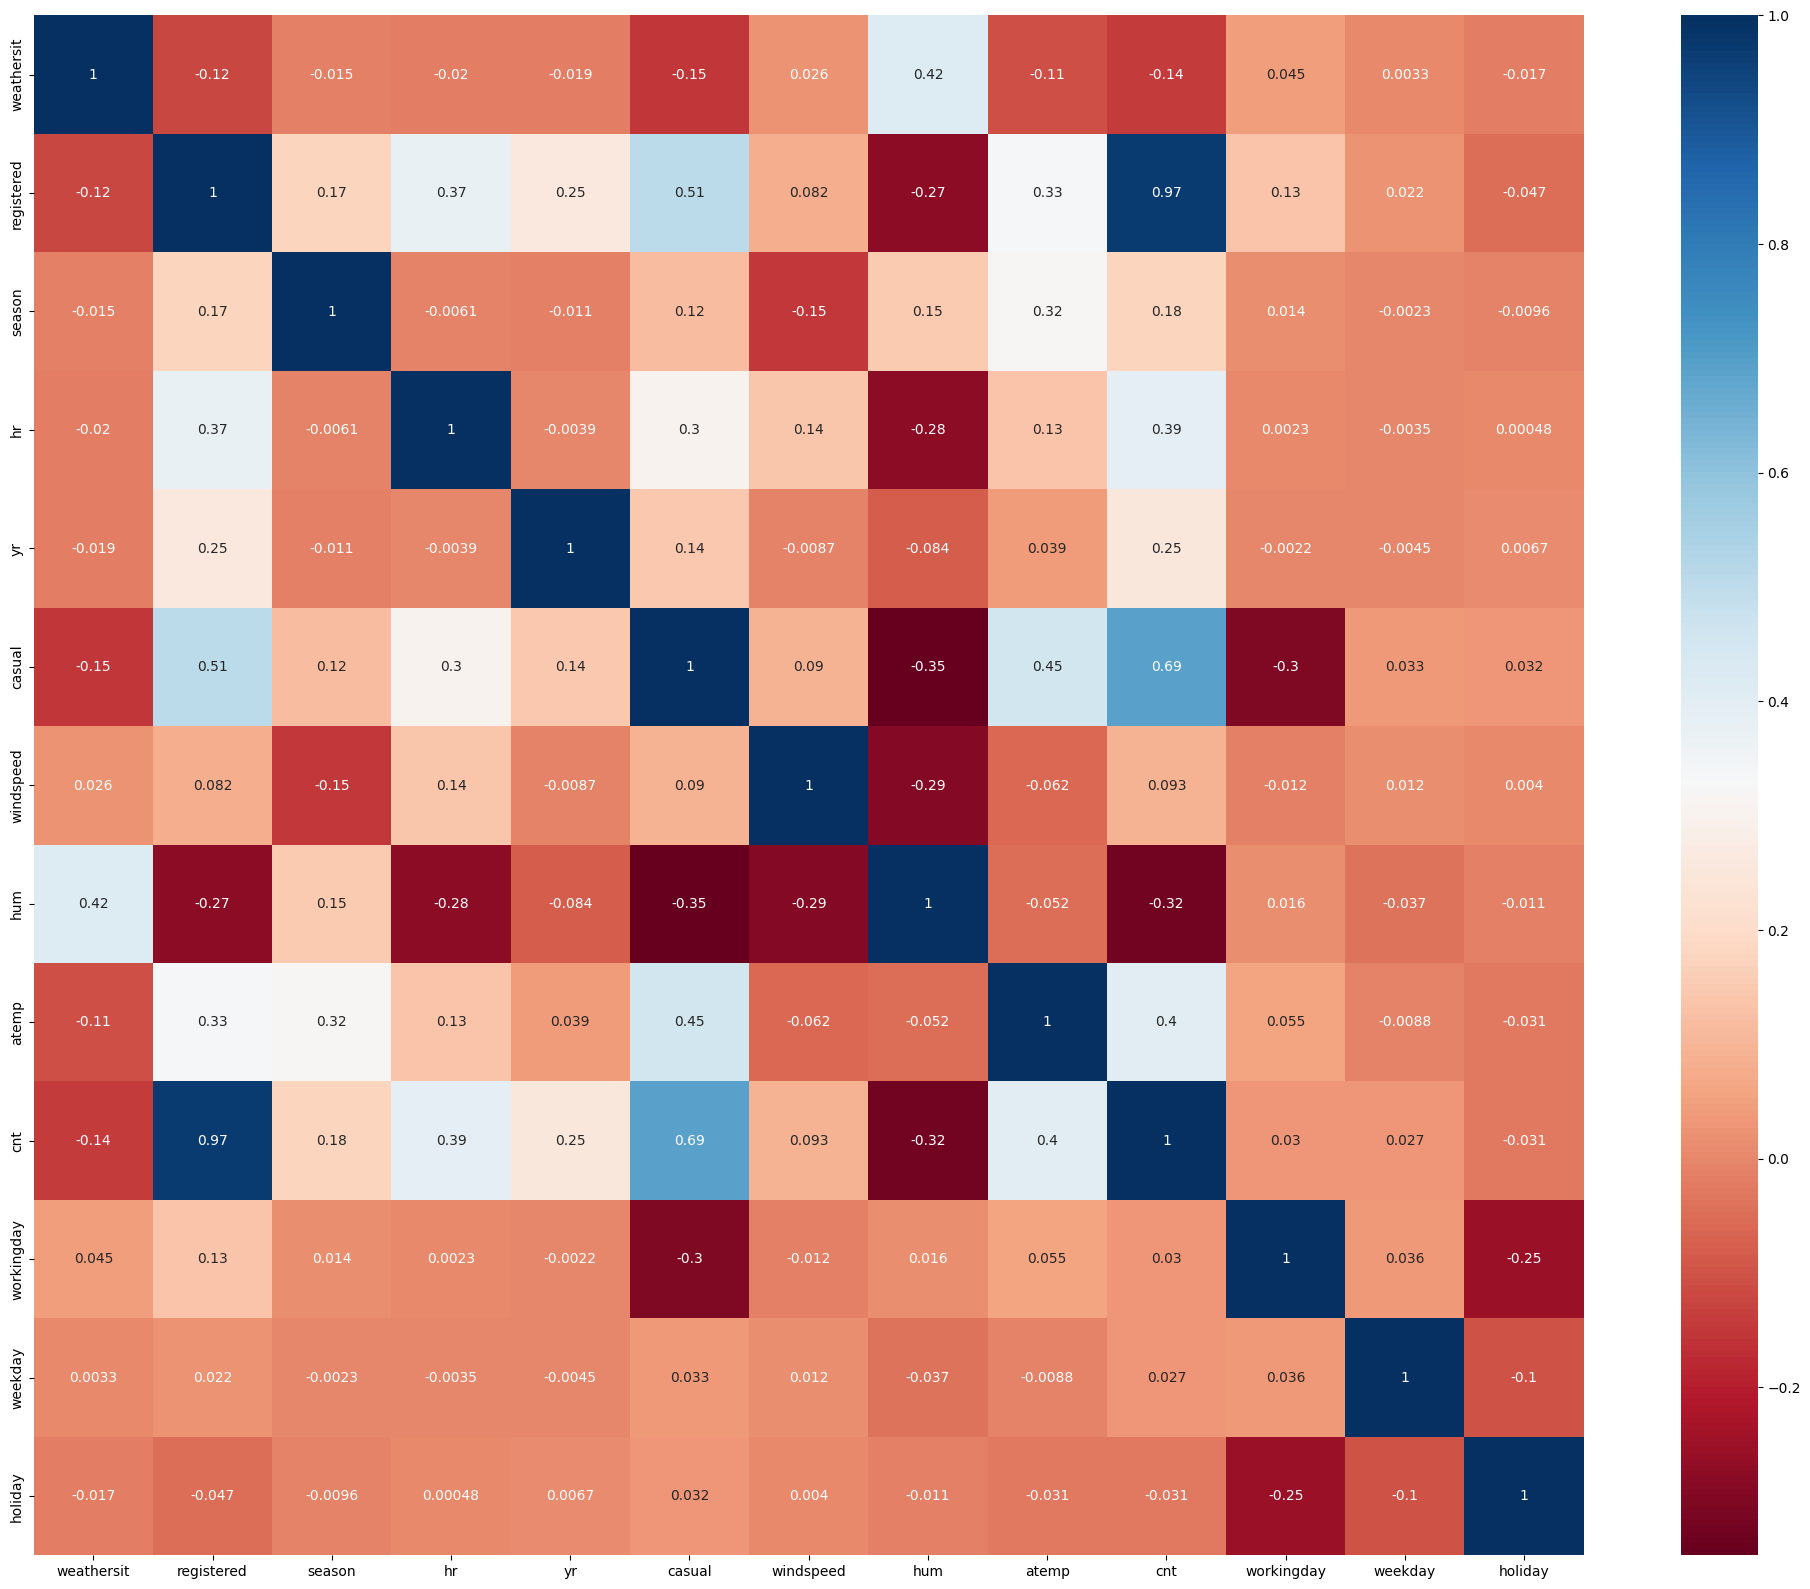

In [48]:
plt.figure(figsize = (25,20))
sns.heatmap(X_dup.corr(), annot = True, cmap="RdBu")
plt.show()

In [64]:
pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
reg = LinearRegression()

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_dup, y_dup, train_size = 0.60, test_size = 0.40, random_state = 42)

pipe.fit(X_train, y_train)
results = pipe.score(X_test, y_test)
print(results)

y_pred = pipe.predict(X_test)
print(y_test)

0.9713839758260838
12830    0.80
8688     0.24
7091     0.32
12230    0.78
431      0.26
         ... 
16335    0.32
10397    0.44
636      0.22
15888    0.30
4325     0.64
Name: temp, Length: 6952, dtype: float64


In [53]:
print(y_pred.shape)

(6952,)


In [65]:
import joblib
joblib.dump(pipe, '/content/drive/MyDrive/Datasets/model_try.pckl')

['/content/drive/MyDrive/Datasets/model_try.pckl']

0.0010580981941047357 0.018435349624991864 0.9713839758260838 0.032528421328197527


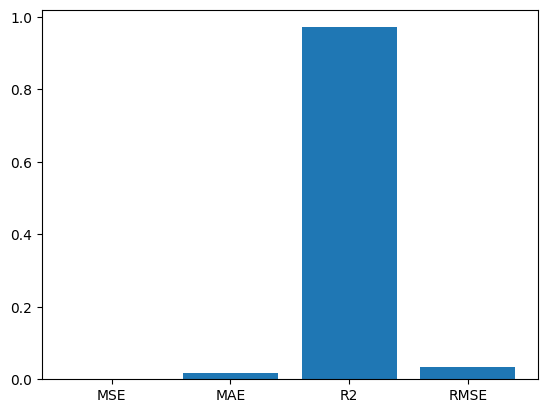

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mse)

print(mse, mae, r2, rmse)
data = {
    'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse
}
types = list(data.keys())
values = list(data.values())
plt.bar(types, values)
plt.show()

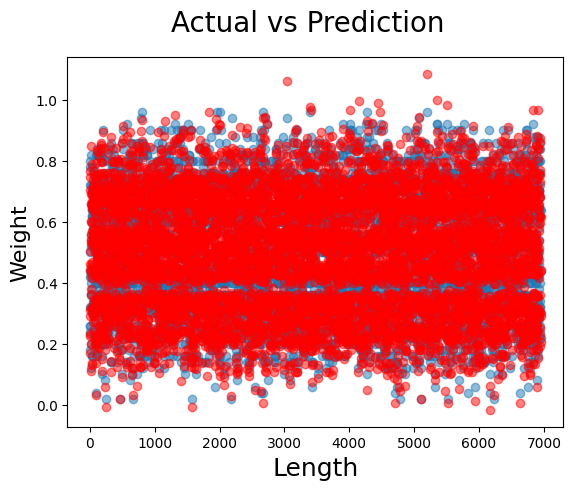

In [67]:
fig = plt.figure()
plt.scatter(range(len(y_test)), y_test, alpha=.5)
plt.scatter(range(len(y_pred)), y_pred, alpha=.5, color = "red")
fig.suptitle('Actual vs Prediction', fontsize = 20)              # Plot heading
plt.xlabel('Length', fontsize = 18)                          # X-label
plt.ylabel('Weight', fontsize = 16)
plt.show()

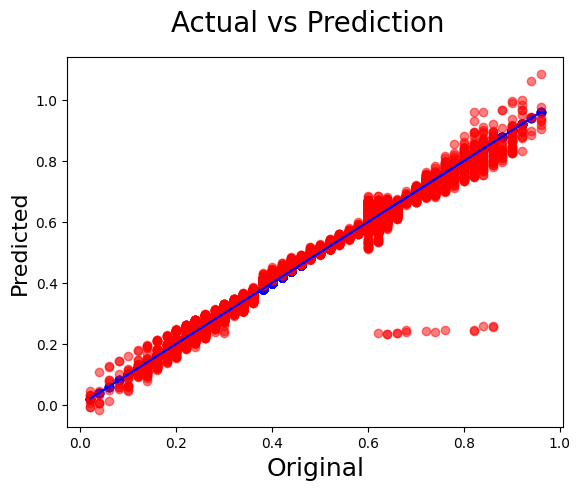

In [68]:
fig = plt.figure()
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted')
fig.suptitle('Actual vs Prediction', fontsize = 20)              # Plot heading
plt.xlabel('Original', fontsize = 18)                          # X-label
plt.ylabel('Predicted', fontsize = 16)
plt.plot(y_test, y_test, color='blue', linestyle='--')
plt.show()

In [62]:
reg = joblib.load('/content/drive/MyDrive/Datasets/model_try.pckl')
print(reg.score(X_test, y_test))

0.9802693161038146
